# 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

print(pd.__version__)
print(np.__version__)
print(tqdm)

1.3.5
1.21.6
<class 'tqdm.std.tqdm'>


# 데이터 로드

In [ ]:
data_url = "https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt"

data = pd.read_table(data_url, names=['score', "reviews"])

# 데이터 확인

In [ ]:
data.head()

,score,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
data.tail()

,score,reviews
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~
199999,5,아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다


In [ ]:
data.shape

(200000, 2)

총 20만개의 데이터로 구성되어있는 것을 확인할 수 있습니다.

# 데이터 전처리

## 중복 데이터 확인

In [ ]:
data[data.duplicated(['reviews'])]

,score,reviews
10958,5,2022년까지 넉넉함
20907,1,배송이느려 페인트칠 다하고 왔네요
49674,1,배송이 너무 늦어요
52247,2,생각보다 별로네요~
63566,2,아직 잘 모르겠어요...
...,...,...
195857,2,딱 돈만큼 하는 제품
196291,2,배송이 느려요
197220,1,정사이즈보다 조금더 크게시켜야할듯
198330,2,배송도 빠르고 좋습니다


92개의 데이터가 중복되어 있는 것을 확인할 수 있습니다.

## 중복데이터 제거

In [ ]:
data = data.drop_duplicates(['reviews'])
data.shape

(199908, 2)

## 결측치 확인

In [ ]:
data.isnull().sum()

score      0
reviews    0
dtype: int64

결측치는 없는것으로 확인할 수 있습니다.

# 학습/테스트 데이터 분리

텍스트 전처리하기 이전에 학습/테스트 데이터를 분리하겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, random_state=42)
train.shape, test.shape

((149931, 2), (49977, 2))

In [ ]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# 텍스트 전처리

텍스트의 띄어쓰기와 맞춤법을 보정하기 위하여 py-hanspell,pykospacing 라이브러리를 설치 후에 사용하겠습니다.

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-j180jhgf
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-j180jhgf
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=95a9fddcbf7f6c55a36a8c4de6a39ba4f87e69f4c8f6a09619b5b16cad261192
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ppva78s/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-nlwl1yg6
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-nlwl1yg6
     |████████████████████████████████| 671.4 MB 1.8 kB/s 
     |████████████████████████████████| 1.3 MB 54.7 MB/s 

## py-hanspell 간단한 예시 사용

In [ ]:
from hanspell import spell_checker
original_text = '안녕하세요.저는한국인입니다.이문장은한글로작성됬습니다.'
result = spell_checker.check(original_text)
print("변경 전 : ", original_text)
print("변경 후 : ",result.checked)

변경 전 :  안녕하세요.저는한국인입니다.이문장은한글로작성됬습니다.
변경 후 :  안녕하세요. 저는 한국인입니다. 이 문장은 한글로 작성됐습니다.


## pykospacing 간단한 예시 사용


In [ ]:
from pykospacing import Spacing
spacing = Spacing()
original_text = '안녕하세요.저는한국인입니다.이문장은한글로작성됬습니다.'
result = spacing(original_text)
print("변경 전 : ", original_text)
print("변경 후 : ",result)

변경 전 :  안녕하세요.저는한국인입니다.이문장은한글로작성됬습니다.
변경 후 :  안녕하세요. 저는 한국인입니다.이 문장은 한글로 작성 됬습니다.


## 띄어쓰기 및 맞춤법 보정

py-hanspell 라이브러리에서 띄어쓰기과 맞춤법을 보정해주기 때문에  
원본 reviews의 띄어쓰기를 모두 제거해주겠습니다.

또한 pykosapcing 라이브러리를 사용하여 py-hanspell 사용시 에러가 나는 텍스트에 대하여는 띄어쓰기만 진행해주겠습니다.

In [ ]:
def remove_spaces(x):
  x = x.replace(" ","")
  return x

train['reviews'] = train['reviews'].apply(remove_spaces)
train['reviews']

0         사이즈를3센치씩늘린건데도작아요그리고색상은완전달라요칙칙한핑크네요ㅠㅠ많이아쉽지만암막효과...
1                                 ㅂ불만족..빗이아픔..멍이피부에빗질못해주겟네요
2         이제품쓰고삼일만에변기물이잘안내려갔어요.혹시나해서다시빼보니물이다시잘내려가네요..,이많...
3                                                 적당하고만족합니다
4                                  편하자고이용하는밀키튼데손은근많이가서저는패쓰요
                                ...                        
149926    그냥그래요ㄷㄷㄷㄷㅂㅂㅂㅂ그냥그래요ㄷㄷㄷㄷㅂㅂㅂㅂㅁㅁㅁㅁㅋㅋㅋㅋㅌㅌㅌㅌㅍㅍㅍㅍㄹㄹㄹㄹ...
149927       비싸요진짜별거아니게허접하게생겼는데이게이만원이라니진짜가방구겨지는것만아니면구매안했음!!
149928                                   100장주문안됩니다500장가능해요
149929            .하림치킨여기서구입하니엄청저렴하네요배송도쾅꽝얼어서도착하고아주만족합니다!ㅋㅋ
149930                                     조금약해보이는데저렴하게잘삿어요
Name: reviews, Length: 149931, dtype: object

훈련 데이터가 모두 띄어쓰기가 제거되어있는것을 확인할 수 있습니다.  
또한 테스트 데이터 또한 모두 제거해주겠습니다.

In [ ]:
test['reviews'] = test['reviews'].apply(remove_spaces)
test['reviews']

0                                          너무낮고솜도적고실망스럽습니다
1                                            피부에뾰루지가많이올라와요
2                    배송도빠르네요가격대비좋은것같아요~~~첨에는힘들어하나조금지나니잘하네요
3                                     재구매입니다.핏도좋고착용감도좋습니다.
4                      파손제품온거출장같다오늘받았는데현재상황장난하시는지택배회사항의하세요
                               ...                        
49972    연결해서쓰려고3단으로2개주문했는데..연결부위맞추기가넘힘드네여거기다세로조립품은연결하는...
49973            허리는너무크고종아리는꽉끼어서약간불편해하네요아들이그래도따뜻하다며잘입고다닙니다
49974       샵에가서받았었는데이거구매하고집에서셀프로하는데넘나좋으네요^^*세트로사길잘한것같아요ㅎㅎ
49975          가격도착하고다좋은데조금얇은감이있네요넓이도조금커서살짝헐렁거리지만그래도만족합니다~
49976                                           아~정말이건아닌듯ㅎ
Name: reviews, Length: 49977, dtype: object

py-hanspell과 pykospacing을 사용하여 reviews를 보정해주겠습니다.  
먼저 py-hanspell 라이브러리를 사용하여 맞춤범 및 띄어쓰기 보정을 진행하고  
에러가 나는 부분은 pykospacing 사용하여 띄어쓰기만 진행하겠습니다.  
하지만 그럼에도 또 에러가 나오면 None 값을 반환하겠습니다.  

```python
from hanspell import spell_checker
from pykospacing import Spacing
import datetime
import time
start_time = time.time()
for i in tqdm(range(len(train))):
  result = None
  err_cnt = 0
  err_text = []
  try:
    train_result = spell_checker.check(train['reviews'][i])
    result = train_result.checked
  except:
    try:
      spacing = Spacing()
      result = spacing(train['reviews'][i])
    except:
      err_cnt += 1
      err_text.append(train['reviews'][i])
      result = None
  train['reviews'][i] = result
end_time = time.time()
sec = (end_time-start_time)
result_time = datetime.timedelta(seconds=sec)
```



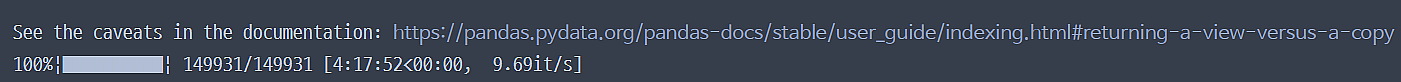

코랩환경에서는 시간이 너무 오래 걸려   
로컬컴퓨터에서 위의 코드를 통하여 train을 전처리하고 저장했습니다.

```python
start_time = time.time()
err_cnt = 0
err_text = []
for i in tqdm(range(len(test))):
  result = None
  try:
    test_result = spell_checker.check(test['reviews'][i])
    result = test_result.checked
  except:
    try:
      spacing = Spacing()
      result = spacing(test['reviews'][i])
    except:
      err_cnt += 1
      err_text.append(test['reviews'][i])
      result = None
  test['reviews'][i] = result
end_time = time.time()
sec = (end_time-start_time)
result_time = datetime.timedelta(seconds=sec)
```

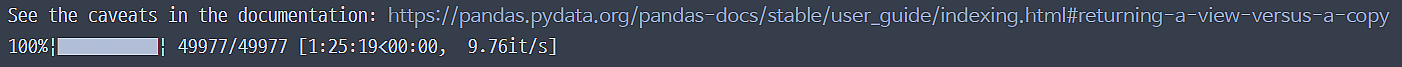

마찬가지로 로컬컴퓨터에서 위의 코드를 통하여 test를 전처리하고 저장했습니다.

저장한 데이터를 로드해서 사용합니다.

In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/preprocessing_train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/preprocessing_test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head()

,score,reviews
0,2,사이즈를 3센티씩 늘린 건데도 작아요 그리고 색상은 정말 달라요 칙칙한 핑크네요ᅲᅲ...
1,2,ᄇ 불만족.. 빗이 아픔.. 멍이 피부에 빗질 못해주겠네요
2,1,이 제품 쓰고 삼 일 만에 변기 물이 잘 안 내려갔어요. 혹시나 해서 다시 빼보니 ...
3,5,적당하고 만족합니다
4,2,편하자고 이용하는 밀키 튼데 손은 근 많이 가서 저는 패스요


In [ ]:
train.tail()

,score,reviews
149926,2,그냥그래요ㄷㄷㄷㄷㅂㅂㅂㅂ그냥그래요ㄷㄷㄷㄷㅂㅂㅂㅂㅁㅁㅁㅁㅋㅋㅋㅋㅌㅌㅌㅌㅍㅍㅍㅍㄹㄹㄹㄹ...
149927,2,비싸요 진짜 별거 아니게 허접하게 생겼는데 이게 이만 원이라니 진짜가 방 구겨지는 ...
149928,2,100장 주문 안됩니다 500장 가능해요
149929,5,.하림치킨여기서구입하니엄청저렴하네요배송도쾅꽝얼어서도착하고아주만족합니다!ㅋㅋ
149930,4,조금 약해 보이는데 저렴하게 잘 샀어요


In [ ]:
test.head()

,score,reviews
0,1,너무 낮고 솜도 적고 실망스럽습니다
1,1,피부에 뾰루지가 많이 올라와요
2,5,배송도 빠르네요 가격 대비 좋은 것 같아요~~~첨에는 힘들어 하나 조금 지나니 잘하네요
3,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.
4,1,파손 제품 온 거 출장 같다 오늘 받았는데 현재 상황 장난하시는지 택배회사 항의하세요


In [ ]:
test.tail()

,score,reviews
49972,2,연결해서 쓰려고 3단으로 2개 주문했는데.. 연결 부위 맞추기가 너무 힘드네요 거기...
49973,2,허리는 너무 크고 종아리는 꽉 끼어서 약간 불편해하네요 아들이 그래도 따뜻하다며 잘...
49974,5,샵에가서받았었는데이거구매하고집에서셀프로하는데넘나좋으네요^^*세트로사길잘한것같아요ㅎㅎ
49975,4,가격 도착하고 다 좋은데 조금 얇은 감이 있네요 넓이도 조금 커서 살짝 헐렁거리지만...
49976,2,아~정말 이건 아닌 듯ㅎ


## 정규 표현식 사용

정규표현식을 사용하여 한글과 숫자외의 특수문자,영어 등 다른 문자 제거

In [7]:
import re
sample = '안녕하세요!1개의(sample)샘플데이터입니다.'
print("변경 전 : ",sample)
print("변경 후 : ",re.sub('[^0-9ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', sample))

변경 전 :  안녕하세요!1개의(sample)샘플데이터입니다.
변경 후 :  안녕하세요 1개의        샘플데이터입니다 


In [ ]:
import re
train['reviews']=train['reviews'].apply(lambda x : re.sub('[^0-9ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', x))
test['reviews']=test['reviews'].apply(lambda x : re.sub('[^0-9ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', x))

In [ ]:
train

,score,reviews
0,2,사이즈를 3센티씩 늘린 건데도 작아요 그리고 색상은 정말 달라요 칙칙한 핑크네요 ...
1,2,불만족 빗이 아픔 멍이 피부에 빗질 못해주겠네요
2,1,이 제품 쓰고 삼 일 만에 변기 물이 잘 안 내려갔어요 혹시나 해서 다시 빼보니 ...
3,5,적당하고 만족합니다
4,2,편하자고 이용하는 밀키 튼데 손은 근 많이 가서 저는 패스요
...,...,...
149926,2,그냥그래요ㄷㄷㄷㄷㅂㅂㅂㅂ그냥그래요ㄷㄷㄷㄷㅂㅂㅂㅂㅁㅁㅁㅁㅋㅋㅋㅋㅌㅌㅌㅌㅍㅍㅍㅍㄹㄹㄹㄹ...
149927,2,비싸요 진짜 별거 아니게 허접하게 생겼는데 이게 이만 원이라니 진짜가 방 구겨지는 ...
149928,2,100장 주문 안됩니다 500장 가능해요
149929,5,하림치킨여기서구입하니엄청저렴하네요배송도쾅꽝얼어서도착하고아주만족합니다 ㅋㅋ


In [ ]:
test

,score,reviews
0,1,너무 낮고 솜도 적고 실망스럽습니다
1,1,피부에 뾰루지가 많이 올라와요
2,5,배송도 빠르네요 가격 대비 좋은 것 같아요 첨에는 힘들어 하나 조금 지나니 잘하네요
3,5,재구매입니다 핏도 좋고 착용감도 좋습니다
4,1,파손 제품 온 거 출장 같다 오늘 받았는데 현재 상황 장난하시는지 택배회사 항의하세요
...,...,...
49972,2,연결해서 쓰려고 3단으로 2개 주문했는데 연결 부위 맞추기가 너무 힘드네요 거기...
49973,2,허리는 너무 크고 종아리는 꽉 끼어서 약간 불편해하네요 아들이 그래도 따뜻하다며 잘...
49974,5,샵에가서받았었는데이거구매하고집에서셀프로하는데넘나좋으네요 세트로사길잘한것같아요ㅎㅎ
49975,4,가격 도착하고 다 좋은데 조금 얇은 감이 있네요 넓이도 조금 커서 살짝 헐렁거리지만...


정규표현식을 거치고 나서 공백문자가 된 데이터 및 결측치 확인 & 제거

In [ ]:
train['reviews'] = train['reviews'].str.replace('^ +', '').replace(' ', np.nan)
print("변경 전 공백문자 수 : ",train['reviews'].isnull().sum())
train['reviews'] = train['reviews'].dropna()
print("변경 후 공백문자 수 : ", train['reviews'].isnull().sum())

변경 전 공백문자 수 :  0
변경 후 공백문자 수 :  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
test['reviews'] = test['reviews'].replace('^ +', '').replace(' ', np.nan)
print("변경 전 공백문자 수 : ",test['reviews'].isnull().sum())
test['reviews'] = test['reviews'].dropna()
print("변경 후 공백문자 수 : ", test['reviews'].isnull().sum())

변경 전 공백문자 수 :  0
변경 후 공백문자 수 :  0


중복 데이터 확인 및 제거

In [ ]:
print("중복 데이터 수 : ", train.duplicated(['reviews']).sum())
print("중복 데이터 제거 전 데이터 수 : ", train.shape[0])
train = train.drop_duplicates(['reviews'])
print("중복 데이터 제거 후 데이터 수 : ", train.shape[0])
print("중복 데이터 수 : ", train.duplicated(['reviews']).sum())

중복 데이터 수 :  369
중복 데이터 제거 전 데이터 수 :  149931
중복 데이터 제거 후 데이터 수 :  149562
중복 데이터 수 :  0


In [ ]:
print("중복 데이터 수 : ", test.duplicated(['reviews']).sum())
print("중복 데이터 제거 전 데이터 수 : ", test.shape[0])
test = test.drop_duplicates(['reviews'])
print("중복 데이터 제거 후 데이터 수 : ", test.shape[0])
print("중복 데이터 수 : ", test.duplicated(['reviews']).sum())

중복 데이터 수 :  51
중복 데이터 제거 전 데이터 수 :  49977
중복 데이터 제거 후 데이터 수 :  49926
중복 데이터 수 :  0


## 불용어 처리 및 토큰화

In [ ]:
stop_words_path =  "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/korea_stop_words.txt"
stop_words_path2 = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/korea_stop_words2.txt"
stop_words_df1 = pd.read_csv(stop_words_path, sep='\t', names=['form','pos', 'ratio'])
stop_words_df2 = pd.read_csv(stop_words_path2)
stop_words_set1 = set(stop_words_df1['form'].values)
stop_words_set2 = set(stop_words_df2['form'].values)
all_stop_words_set = stop_words_set1.union(stop_words_set2)
stop_words = list(all_stop_words_set)
print(len(stop_words))

664


2개의 불용어사전을 합쳐서 664개의 불용어를 얻을 수 있다.

토큰화를 위하여 konlpy를 설치합니다.

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 56.1 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 1.80 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-07-24 04:51:57--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.1

## konlpy 형태소 분석기

### konlpy 형태소분석기 사용 예시

In [ ]:
from konlpy.tag import Okt, Komoran, Hannanum, Kkma, Mecab
okt=Okt()
komoran = Komoran()
hannanum = Hannanum()
kkma = Kkma()
mecab = Mecab()
# 형태소
print("okt.morphs : ", okt.morphs('안녕하세요. 저는 딥러닝 입니다.'))
print("komoran.morphs : ", komoran.morphs('안녕하세요. 저는 딥러닝 입니다.'))
print("hannanum.morphs : ", hannanum.morphs('안녕하세요. 저는 딥러닝 입니다.'))
print("kkma.morphs : ", kkma.morphs('안녕하세요. 저는 딥러닝 입니다.'))
print("mecab.morphs : ", mecab.morphs('안녕하세요. 저는 딥러닝 입니다.'))

okt.morphs :  ['안녕하세요', '.', '저', '는', '딥', '러닝', '입니다', '.']
komoran.morphs :  ['안녕하세요', '.', '저', '는', '딥러닝', '이', 'ㅂ니다', '.']
hannanum.morphs :  ['안녕', '하', '세', '요', '.', '저', '는', '딥러닝', '일', 'ㅂ니다', '.']
kkma.morphs :  ['안녕', '하', '세요', '.', '저', '는', '딥', '러닝', '이', 'ㅂ니다', '.']
mecab.morphs :  ['안녕', '하', '세요', '.', '저', '는', '딥', '러닝', '입니다', '.']


## 각 형태소 분석기 시간 비교

In [ ]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
import time
import datetime

```python
okt=Okt()

start_time = time.time()
X_train = []
for i in tqdm(range(len(train[:10000]))):
    sentence =train['reviews'][i]
    X_train.append([word for word in okt.morphs(sentence) if not word in stop_words])
end_time = time.time()
sec = (end_time-start_time)
result_time = datetime.timedelta(seconds=sec)
print()
print("okt 시간 : ",result_time)
```

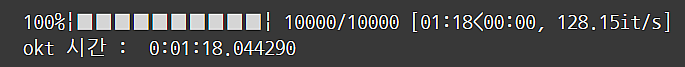

10000개의 데이터를 okt 형태소 분석기를 통하여 변환해보니 약 80초 정도 소요되는 것을 확인할 수 있었습니다.

15만개의 데이터를 처리할 경우 약 20분정도 소요될 것으로 예상됩니다.

```python
komoran = Komoran()

start_time = time.time()
X_train = []
for i in tqdm(range(len(train[:10000]))):
    sentence =train['reviews'][i]
    X_train.append([word for word in komoran.morphs(sentence) if not word in stop_words])
end_time = time.time()
sec = (end_time-start_time)
result_time = datetime.timedelta(seconds=sec)
print()
print("komoran 시간 : ",result_time)
```

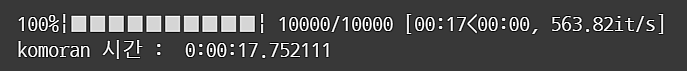

10000개의 데이터를 komoran 형태소 분석기를 통하여 변환해보니 약 17초 정도 소요되는 것을 확인할 수 있었습니다.

15만개의 데이터를 처리할 경우 약 4분 15초정도 소요될 것으로 예상됩니다.

```python
hannanum = Hannanum()

start_time = time.time()
X_train = []
for i in tqdm(range(len(train[:10000]))):
    sentence =train['reviews'][i]
    X_train.append([word for word in hannanum.morphs(sentence) if not word in stop_words])
end_time = time.time()
sec = (end_time-start_time)
result_time = datetime.timedelta(seconds=sec)
print()
print("hannanum 시간 : ",result_time)
```

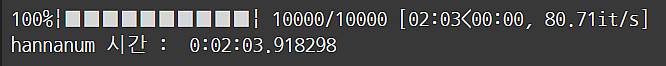

10000개의 데이터를 hannanum 형태소 분석기를 통하여 변환해보니 약 123초 정도 소요되는 것을 확인

15만개의 데이터를 처리할 경우 약 30분 45초정도 소요

```python
kkma = Kkma(max_heap_size= 1024 * 6)

start_time = time.time()
X_train = []
for i in tqdm(range(len(train[:10000]))):
    sentence =train['reviews'][i]
    X_train.append([word for word in kkma.morphs(sentence) if not word in stop_words])
end_time = time.time()
sec = (end_time-start_time)
result_time = datetime.timedelta(seconds=sec)
print()
print("kkma 시간 : ",result_time)
```

kkma 형태소 분석기의 경우 java.lang.OutOfMemoryError: Java heap space 오류가 지속적으로 발생하였고, 해결법을 찾지 못했습니다.  
kkma 형태소 분석기의 고질적인 문제로 추측되며, 일반적으로 kkma 형태소 분석기의 시간이 가장 오래걸린다고 알려져있습니다.

```python
mecab = Mecab()

start_time = time.time()
X_train = []
for i in tqdm(range(len(train[:10000]))):
    sentence =train['reviews'][i]
    X_train.append([word for word in mecab.morphs(sentence) if not word in stop_words])
end_time = time.time()
sec = (end_time-start_time)
result_time = datetime.timedelta(seconds=sec)
print()
print("mecab 시간 : ",result_time)
```

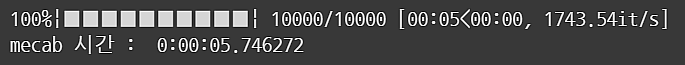

## 형태소 분석기 사용

새로운 데이터 프레임을 생성한 후에 모든 결과를 적재후에 파일로 저장

In [ ]:
def tokenization(analyzer, data, stop_words):
  #시간측정 시작
  start_time = time.time()
  temp = []
  for i in tqdm(range(len(data))):
    sentence = data['reviews'][i]
    temp.append([word for word in analyzer.morphs(sentence) if not word in stop_words])
  #시간측정 종료
  end_time =time.time()
  sec = (end_time-start_time)
  result_time = datetime.timedelta(seconds=sec)
  print()
  print(f"{analyzer.__class__.__name__} Time : ",result_time)
  return temp

In [ ]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

### Okt

In [ ]:
from konlpy.tag import Okt, Komoran, Hannanum, Kkma, Mecab
okt = Okt()
print("Train Data")
X_train = tokenization(okt, train, stop_words)
new_train['okt'] = pd.Series(X_train)

Train Data


100%|██████████| 149562/149562 [22:30<00:00, 110.75it/s]


Okt Time :  0:22:30.411403


In [ ]:
okt=Okt()
print("Test Data")
X_test= tokenization(okt, test, stop_words)
new_test['okt'] = pd.Series(X_test)

Test Data


100%|██████████| 49926/49926 [08:16<00:00, 100.46it/s]


Okt Time :  0:08:16.981755


### Komoran

In [ ]:
komoran = Komoran()
print("Train Data")
X_train = tokenization(komoran, train, stop_words)
new_train['komoran'] = pd.Series(X_train)

Train Data


100%|██████████| 149562/149562 [04:05<00:00, 608.88it/s]


Komoran Time :  0:04:05.641169


In [ ]:
komoran = Komoran()
print("Test Data")
X_test= tokenization(komoran, test, stop_words)
new_test['komoran'] = pd.Series(X_test)

Test Data


100%|██████████| 49926/49926 [01:28<00:00, 561.94it/s]



Komoran Time :  0:01:28.861345


### Hannanum

In [ ]:
hannanum = Hannanum()
print("Train Data")
X_train = tokenization(hannanum, train, stop_words)
new_train['hannanum'] = pd.Series(X_train)

Train Data


100%|██████████| 149562/149562 [37:40<00:00, 66.15it/s]


Hannanum Time :  0:37:40.848295


In [ ]:
hannanum = Hannanum()
print("Test Data")
X_test= tokenization(hannanum, test, stop_words)
new_test['hannanum'] = pd.Series(X_test)

Test Data


100%|██████████| 49926/49926 [14:04<00:00, 59.14it/s]


Hannanum Time :  0:14:04.224226


### Mecab

In [ ]:
mecab = Mecab()
print("Train Data")
X_train = tokenization(mecab, train, stop_words)
new_train['mecab'] = pd.Series(X_train)

Train Data


100%|██████████| 149562/149562 [00:48<00:00, 3088.44it/s]



Mecab Time :  0:00:48.430855


In [ ]:
mecab = Mecab()
print("Test Data")
X_test= tokenization(mecab, test, stop_words)
new_test['mecab'] = pd.Series(X_test)

Test Data


100%|██████████| 49926/49926 [00:15<00:00, 3298.24it/s]



Mecab Time :  0:00:15.148718


In [ ]:
train_data = pd.concat([train, new_train], axis=1)
test_data = pd.concat([test, new_test], axis=1)
train_data.head()

,score,reviews,okt,komoran,hannanum,mecab
0,2,사이즈를 3센티씩 늘린 건데도 작아요 그리고 색상은 정말 달라요 칙칙한 핑크네요 ...,"[사이즈, 3, 센티, 씩, 늘린, 건데, 도, 작아요, 색상, 은, 정말, 달라,...","[사이즈, 3, 센티, 씩, 늘리, ㄴ, 걸, ㄴ데, 도, 작, 아요, 색상, 은,...","[사이즈, 3센티, 씩, 늘리, ㄴ, ㄴ데, 도, 작, 요, 색상, 은, 정말, 다...","[사이즈, 3, 센티, 씩, 늘린, 건데, 도, 작, 아요, 색상, 은, 정말, 달..."
1,2,불만족 빗이 아픔 멍이 피부에 빗질 못해주겠네요,"[불만족, 빗, 아픔, 멍, 피부, 빗질, 못, 해주겠네요]","[불, 만족, 빗, 아픔, 멍, 피부, 빗, 질, 겠, 네요]","[불만족, 빗, 아프, ㅁ, 멍, 피부, 빗질, 겠네요]","[불, 만족, 빗이, 아픔, 멍, 피부, 빗, 질, 못해, 겠, 네요]"
2,1,이 제품 쓰고 삼 일 만에 변기 물이 잘 안 내려갔어요 혹시나 해서 다시 빼보니 ...,"[제품, 쓰고, 만에, 변기, 물이, 내려갔어요, 해서, 빼, 보니, 물이, 내려가...","[제품, 쓰, 고, 만, 변기, 물, 내려가, 았, 어요, 혹시나, 아서, 빼, 니...","[제품, 쓰, 고, 만, 변기, 물, 내리, 아아, 요, 어서, 빼, 니, 물, 내...","[제품, 쓰, 고, 만, 변기, 물, 내려갔, 어요, 혹시나, 해서, 빼, 니, 물..."
3,5,적당하고 만족합니다,"[적당하고, 만족합니다]","[적당, 고, 만족, ㅂ니다]","[적당, 하고, 만족, ㅂ니다]","[적당, 고, 만족, 합니다]"
4,2,편하자고 이용하는 밀키 튼데 손은 근 많이 가서 저는 패스요,"[편하자고, 이용, 하는, 밀키, 튼데, 손, 은, 근, 많이, 가서, 는, 패스, 요]","[편하, 자고, 이용, 는, 밀, 기, 트, ㄴ데, 손은, ㄴ, 많이, 아서, 는,...","[편하, 고, 이용, 는, 밀키, 트, ㄴ데, 손, 은, 근, 서, 는, 패스요]","[편하, 자고, 이용, 는, 밀키, 튼, 손, 은, 근, 많이, 서, 는, 패스, 요]"


In [ ]:
test_data.head()

,score,reviews,okt,komoran,hannanum,mecab
0,1,너무 낮고 솜도 적고 실망스럽습니다,"[너무, 낮고, 솜, 도, 적고, 실망, 스럽습니다]","[너무, 낮, 고, 솜, 도, 고, 실망, 스럽]","[너무, 낮, 고, 솜, 도, 고, 실망, 스럽]","[너무, 낮, 고, 솜, 도, 고, 실망, 스럽]"
1,1,피부에 뾰루지가 많이 올라와요,"[피부, 뾰루지, 많이, 올라와요]","[피부, 뾰루지, 많이, 올라오, 아요]","[피부, 뾰루지, 오르]","[피부, 뾰루지, 많이, 올라, 와요]"
2,5,배송도 빠르네요 가격 대비 좋은 것 같아요 첨에는 힘들어 하나 조금 지나니 잘하네요,"[배송, 도, 빠르네요, 가격, 대비, 좋은, 같아요, 첨, 에는, 힘들어, 지나니...","[배, 송도, 빠르, 네요, 가격, 대비, 은, 아요, 첨, 는, 힘들, 지나, 니...","[배송, 도, 빠르, 요, 가격, 대비, 은, 요, 첨, 에는, 힘들, 지나, 니,...","[배송, 도, 빠르, 네요, 가격, 대비, 은, 아요, 첨, 는, 힘들, 지나, 니..."
3,5,재구매입니다 핏도 좋고 착용감도 좋습니다,"[재구매, 입니다, 핏, 도, 좋고, 착용, 감도, 좋습니다]","[재, 구매, ㅂ니다, 핏도, 고, 착용감, 도]","[재구매, ㅂ니다, 핏, 도, 고, 착용감, 도]","[재, 구매, 입니다, 핏, 도, 고, 착용감, 도]"
4,1,파손 제품 온 거 출장 같다 오늘 받았는데 현재 상황 장난하시는지 택배회사 항의하세요,"[파손, 제품, 온, 거, 출장, 오늘, 받았는데, 현재, 상황, 장난, 하시는지,...","[파손, 제품, ㄴ, 거, 출장, 다, 오늘, 았, 는데, 현재, 상황, 장난, 시...","[파손, 제품, ㄴ, 출장, 다, 오늘, 아ㄴ데, 현재, 상황, 장난, 시는지, 택...","[파손, 제품, 온, 거, 출장, 다, 오늘, 았, 는데, 현재, 상황, 장난, 시..."


토큰화를 진행한 데이터와 불러온 데이터를 concat하여 새로운 데이터프레임을 생성하고 저장합니다.

In [ ]:
train_data['mecab'].values

array([list(['사이즈', '3', '센티', '씩', '늘린', '건데', '도', '작', '아요', '색상', '은', '정말', '달라요', '칙칙', '핑크', '네요', '많이', '아쉽', '암막', '효과', '는', '아요']),
       list(['불', '만족', '빗이', '아픔', '멍', '피부', '빗', '질', '못해', '겠', '네요']),
       list(['제품', '쓰', '고', '만', '변기', '물', '내려갔', '어요', '혹시나', '해서', '빼', '니', '물', '내려가', '네요', '은', '걸', '다', '어쩌', '나요', '반품', '고', '다']),
       ..., list(['100', '장', '주문', '됩니다', '500', '장', '가능']),
       list(['하림', '치킨', '서', '구입', '니', '엄청', '저렴', '네요', '배송', '도', '쾅', '꽝', '얼', '어서', '도착', '고', '아주', '만족', '합니다', 'ㅋㅋ']),
       list(['약해', '는데', '저렴', '게', '샀어요'])], dtype=object)

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/"
train_data.to_csv(path+'new_train.csv', index=False)
test_data.to_csv(path+'new_test.csv', index=False)

In [ ]:
train_data.to_parquet(path+'new_train.parquet', index=False)
test_data.to_parquet(path+'new_test.parquet', index=False)